# 1.问题1

## 1.1导入数据

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor 
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE  
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Lasso  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import MinMaxScaler  
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn import metrics
import plotly_express as px
import seaborn as sns
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNetCV,LassoCV,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from deepforest import CascadeForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score
plt.rcParams['font.sans-serif'] = ['SimHei'] #显示中文

d:\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data=pd.read_excel('D:\\my_dateset\\data_pre.xlsx',index_col='SMILES')
label=pd.read_excel('D:\my_dateset\ERα_activity.xlsx',index_col='SMILES',sheet_name='training')
label=label.drop("IC50_nM",axis=1)
data

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,pIC50
SMILES,,,,,,,,,,,,,,,,,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,33,...,64.771680,2.089409,15.471445,8.858910,3.406628,3011,47,4.666,166,8.602060
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,37,...,68.960024,2.089698,15.486947,8.863774,3.406648,3516,54,5.804,174,8.124939
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,29,...,68.748923,2.083301,18.011114,11.390412,3.406644,3542,52,2.964,176,8.508638
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,37,...,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,6.015,174,8.408935
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,31,...,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,4.462,174,8.130768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=C4c5ccc(O)cc5)c6ccc(O)cc6)c2)c1,0,1.8193,3.309852,177.6817,89.159790,24,24,73,43,30,...,88.709996,2.063023,25.470481,21.946991,0.000000,7121,70,2.526,236,6.131944
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\c5cc(O)cc(O)c5)c4)c6ccc(O)cc6,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,...,84.662088,2.064929,24.928962,21.405589,0.000000,6171,66,1.884,228,5.850781
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c5cc(O)cc(O)c5)cc4)c6ccc(O)cc6,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,...,84.660642,2.064894,24.923083,21.400883,0.000000,6421,66,1.884,228,7.721246


In [3]:
X=data.iloc[:,:504]
y=label

# 基于随机森林的特征选择重要性排序

In [4]:
#基于随机森林的特征选择重要性排序
from sklearn.preprocessing import StandardScaler  
#标准化
scaler = StandardScaler()  
#数据标准化
X=scaler.fit_transform(X=data.iloc[:,:504]) 
y=label
#分割数据
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)

RF = RandomForestRegressor(n_estimators=500, random_state=0, max_features=20,  n_jobs=2) 
RF.fit(Xtrain,ytrain)
r2_score1=RF.score(Xtest,ytest)
print(r2_score1)#0.7548612270384614

C:\Users\赵龙\AppData\Local\Temp\ipykernel_37688\2848373431.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(Xtrain,ytrain)


0.7548612270384614


In [5]:
feature=[]
for i in range(0,504):
    feature.append(data.columns[i])
feature=pd.DataFrame(feature)
feature

,0
0,nAcid
1,ALogP
2,ALogp2
3,AMR
4,apol
...,...
499,WTPT-5
500,WPATH
501,WPOL
502,XLogP


In [6]:
#对特征重要性降序排序
#sorted(RF.feature_importances_, reverse=True)

In [7]:
#生成特征重要性组
feature_RF=pd.DataFrame(RF.feature_importances_)
minmax = MinMaxScaler()
feature_RF=pd.DataFrame(minmax.fit_transform(feature_RF.values.reshape(-1,1)))
feature_RF=pd.concat((feature,feature_RF),axis=1)
feature_RF.columns=['feature','importance']
feature_RF.to_excel('D:\\my_dateset\\feature_RF.xlsx')

In [8]:
#对其进行降序排序
feature_RF=feature_RF.sort_values(by='importance',ascending=False)
feature_RF

,feature,importance
367,LipoaffinityIndex,1.000000
315,maxHsOH,0.947906
283,minsssN,0.904223
249,minHsOH,0.838329
439,MDEC-23,0.812787
...,...,...
358,maxsSH,0.000000
219,SssssNp,0.000000
231,SdssS,0.000000
317,maxHsSH,0.000000


# 基于Lasso回归的特征选择模型

In [9]:

#标准化
scaler = StandardScaler()  
#数据标准化
X=scaler.fit_transform(X=data.iloc[:,:504]) 
y=label
#分割数据
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)
#设置alpha范围
alpha_range = np.logspace(-10,-2,200,base=10)#设置200个自定义正则项的值
#模型建立5次交叉验证
lasso_ = LassoCV(alphas=alpha_range,cv=5).fit(Xtrain,ytrain)
#得到最好的参数alpha
best_alpha = lasso_.alpha_
print(best_alpha)#0.0022739657523579274
#计算R2分数
r2_score2=lasso_.score(Xtest,ytest)
print(r2_score2)#0.6462551774703207

d:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.40268429135403494, tolerance: 0.22225597201959318
  model = cd_fast.enet_coordinate_descent_gram(
d:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4421225284628463, tolerance: 0.22225597201959318
  model = cd_fast.enet_coordinate_descent_gram(
d:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to i

0.0022739657523579274
0.6462551774703207


d:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.362e+01, tolerance: 2.794e-01
  model = cd_fast.enet_coordinate_descent(


In [10]:
# 使用LassoCV自带正则化路径长度和路径中的alpha个数来自动建立alpha选择的范围
ls_ = LassoCV(eps=0.0001,n_alphas=300,cv=5).fit(Xtrain,ytrain)
# 查看最佳alpha
b_alpha = ls_.alpha_  # 0.0023607875540394823
print(b_alpha)
# 查看R2指数
r2_score2= ls_.score(Xtest,ytest) # 0.6463695015671551
print(r2_score2)
#得到选择alpha范围为0.0022-0.0023即可

d:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24707045448326426, tolerance: 0.22225597201959318
  model = cd_fast.enet_coordinate_descent_gram(
d:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2577436621036213, tolerance: 0.22225597201959318
  model = cd_fast.enet_coordinate_descent_gram(
d:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to i

0.0023607875540394823
0.6463695015671551


d:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.927e+01, tolerance: 2.794e-01
  model = cd_fast.enet_coordinate_descent(


In [11]:
#确定好参数生成特征重要性表
lasso = Lasso(alpha=0.0023607875540394823)  
lasso.fit(Xtrain, ytrain)   
feature_LA=pd.DataFrame(lasso.coef_)
minmax = MinMaxScaler()
feature_LA=pd.DataFrame(minmax.fit_transform(feature_LA.values.reshape(-1,1)))
r2_score2 = lasso_.score(Xtest,ytest)
print(r2_score2) 
feature_LA.to_excel('D:\\my_dateset\\feature_LA.xlsx')

0.6462551774703207


d:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.927e+01, tolerance: 2.794e-01
  model = cd_fast.enet_coordinate_descent(


# 递归特征消除法

In [12]:
#标准化
scaler = StandardScaler()  
#数据标准化
X=scaler.fit_transform(X=data.iloc[:,:504]) 
y=label
#分割数据
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)

#使用线性模型
lr = LinearRegression()  
rfe = RFECV(lr, step=1, cv=5)
rfe.fit(Xtrain,ytrain)  

#特征重要性
feature_RFE = rfe.ranking_
#将重要性去量钢化
minmax = MinMaxScaler()  
feature_RFE=pd.DataFrame(feature_RFE)
feature_RFE=minmax.fit_transform(feature_RFE.values.reshape(-1,1))
feature_RFE=pd.DataFrame(feature_RFE)
r2_score3=rfe.score(Xtest,ytest)
print(r2_score3)
feature_RFE.to_excel('D:\\my_dateset\\feature_RFE.xlsx')

0.4622616557752739


# 基于L2正则化Ridge regression的特征选择

In [13]:
#标准化
scaler = StandardScaler()  
#数据标准化
X=scaler.fit_transform(X=data.iloc[:,:504]) 
y=label
#分割数据
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)
#设置alpha范围
alpha_range = np.logspace(-10,-2,200,base=10)#设置200个自定义正则项的值
#模型建立5次交叉验证
ridge = RidgeCV(alphas=alpha_range,cv=5).fit(Xtrain,ytrain)
#得到最好的参数alpha
best_alpha = ridge.alpha_
print(best_alpha)#0.005231099308056258
#计算R2分数
r2_score4=ridge.score(Xtest,ytest)
print(r2_score4)#0.522444230173527
ypre=ridge.predict(Xtest)
RMSE =  np.sqrt(metrics.mean_squared_error(ytest, ypre))
print(RMSE)#0.9836148789471646

0.005231099308056258
0.5224442301735144
0.9836148789471777


In [14]:
#确定好参数生成特征重要性表
ridge= Ridge(alpha=0.005231099308056258)  
ridge.fit(Xtrain, ytrain)   
feature_RID=pd.DataFrame(ridge.coef_)
#归一化
minmax = MinMaxScaler()
feature_RID=pd.DataFrame(minmax.fit_transform(feature_RID.values.reshape(-1,1)))
r2_score4 = ridge.score(Xtest,ytest)
print(r2_score4) 
feature_RID.to_excel('D:\\my_dateset\\feature_RID.xlsx')

0.5224442301735144


# 导入特征排序数组

In [15]:
feature_rank=pd.read_excel('D:\\my_dateset\\feature_rank.xlsx')
feature_rank

,feature,sum
0,maxHsOH,0.773179
1,minsssN,0.747391
2,MLFER_A,0.717124
3,LipoaffinityIndex,0.700676
4,maxsssN,0.680085
...,...,...
499,SsCl,0.271449
500,SaasN,0.262706
501,maxsNH2,0.257170
502,nS,0.248390


In [28]:
#生成前30个特征
feature_30=[]
for i in range(504):

    if feature_rank.iloc[i,1]>=feature_rank['sum'].quantile(0.94):
        feature_30.append(feature_rank.iloc[i,0])
len(feature_30)
#feature_30.append('pIC50')
feature_30.remove('SHsOH')
feature_30



['maxHsOH',
 'minsssN',
 'MLFER_A',
 'LipoaffinityIndex',
 'maxsssN',
 'MDEC-23',
 'maxssO',
 'BCUTc-1l',
 'minssO',
 'minHsOH',
 'maxdssC',
 'maxHBd',
 'BCUTp-1h',
 'minHBint10',
 'ATSc3',
 'AMR',
 'XLogP',
 'maxsOH',
 'hmin',
 'C1SP2',
 'VPC-6',
 'ATSm5',
 'MDEC-12',
 'MDEC-22',
 'maxHBint10',
 'ATSc4',
 'SHBint8',
 'maxaaCH',
 'minHBd',
 'fragC']

In [29]:
#生成前20个特征
feature_20=[]
for i in range(504):

    if feature_rank.iloc[i,1]>=feature_rank['sum'].quantile(0.961):
        feature_20.append(feature_rank.iloc[i,0])
#feature_20.append('pIC50')
len(feature_20)

feature_20



['maxHsOH',
 'minsssN',
 'MLFER_A',
 'LipoaffinityIndex',
 'maxsssN',
 'MDEC-23',
 'maxssO',
 'BCUTc-1l',
 'minssO',
 'minHsOH',
 'maxdssC',
 'maxHBd',
 'BCUTp-1h',
 'minHBint10',
 'ATSc3',
 'AMR',
 'XLogP',
 'maxsOH',
 'hmin',
 'C1SP2']

# 生成30维新数据集以及热力图


Text(0.5, 1.0, '前30维')

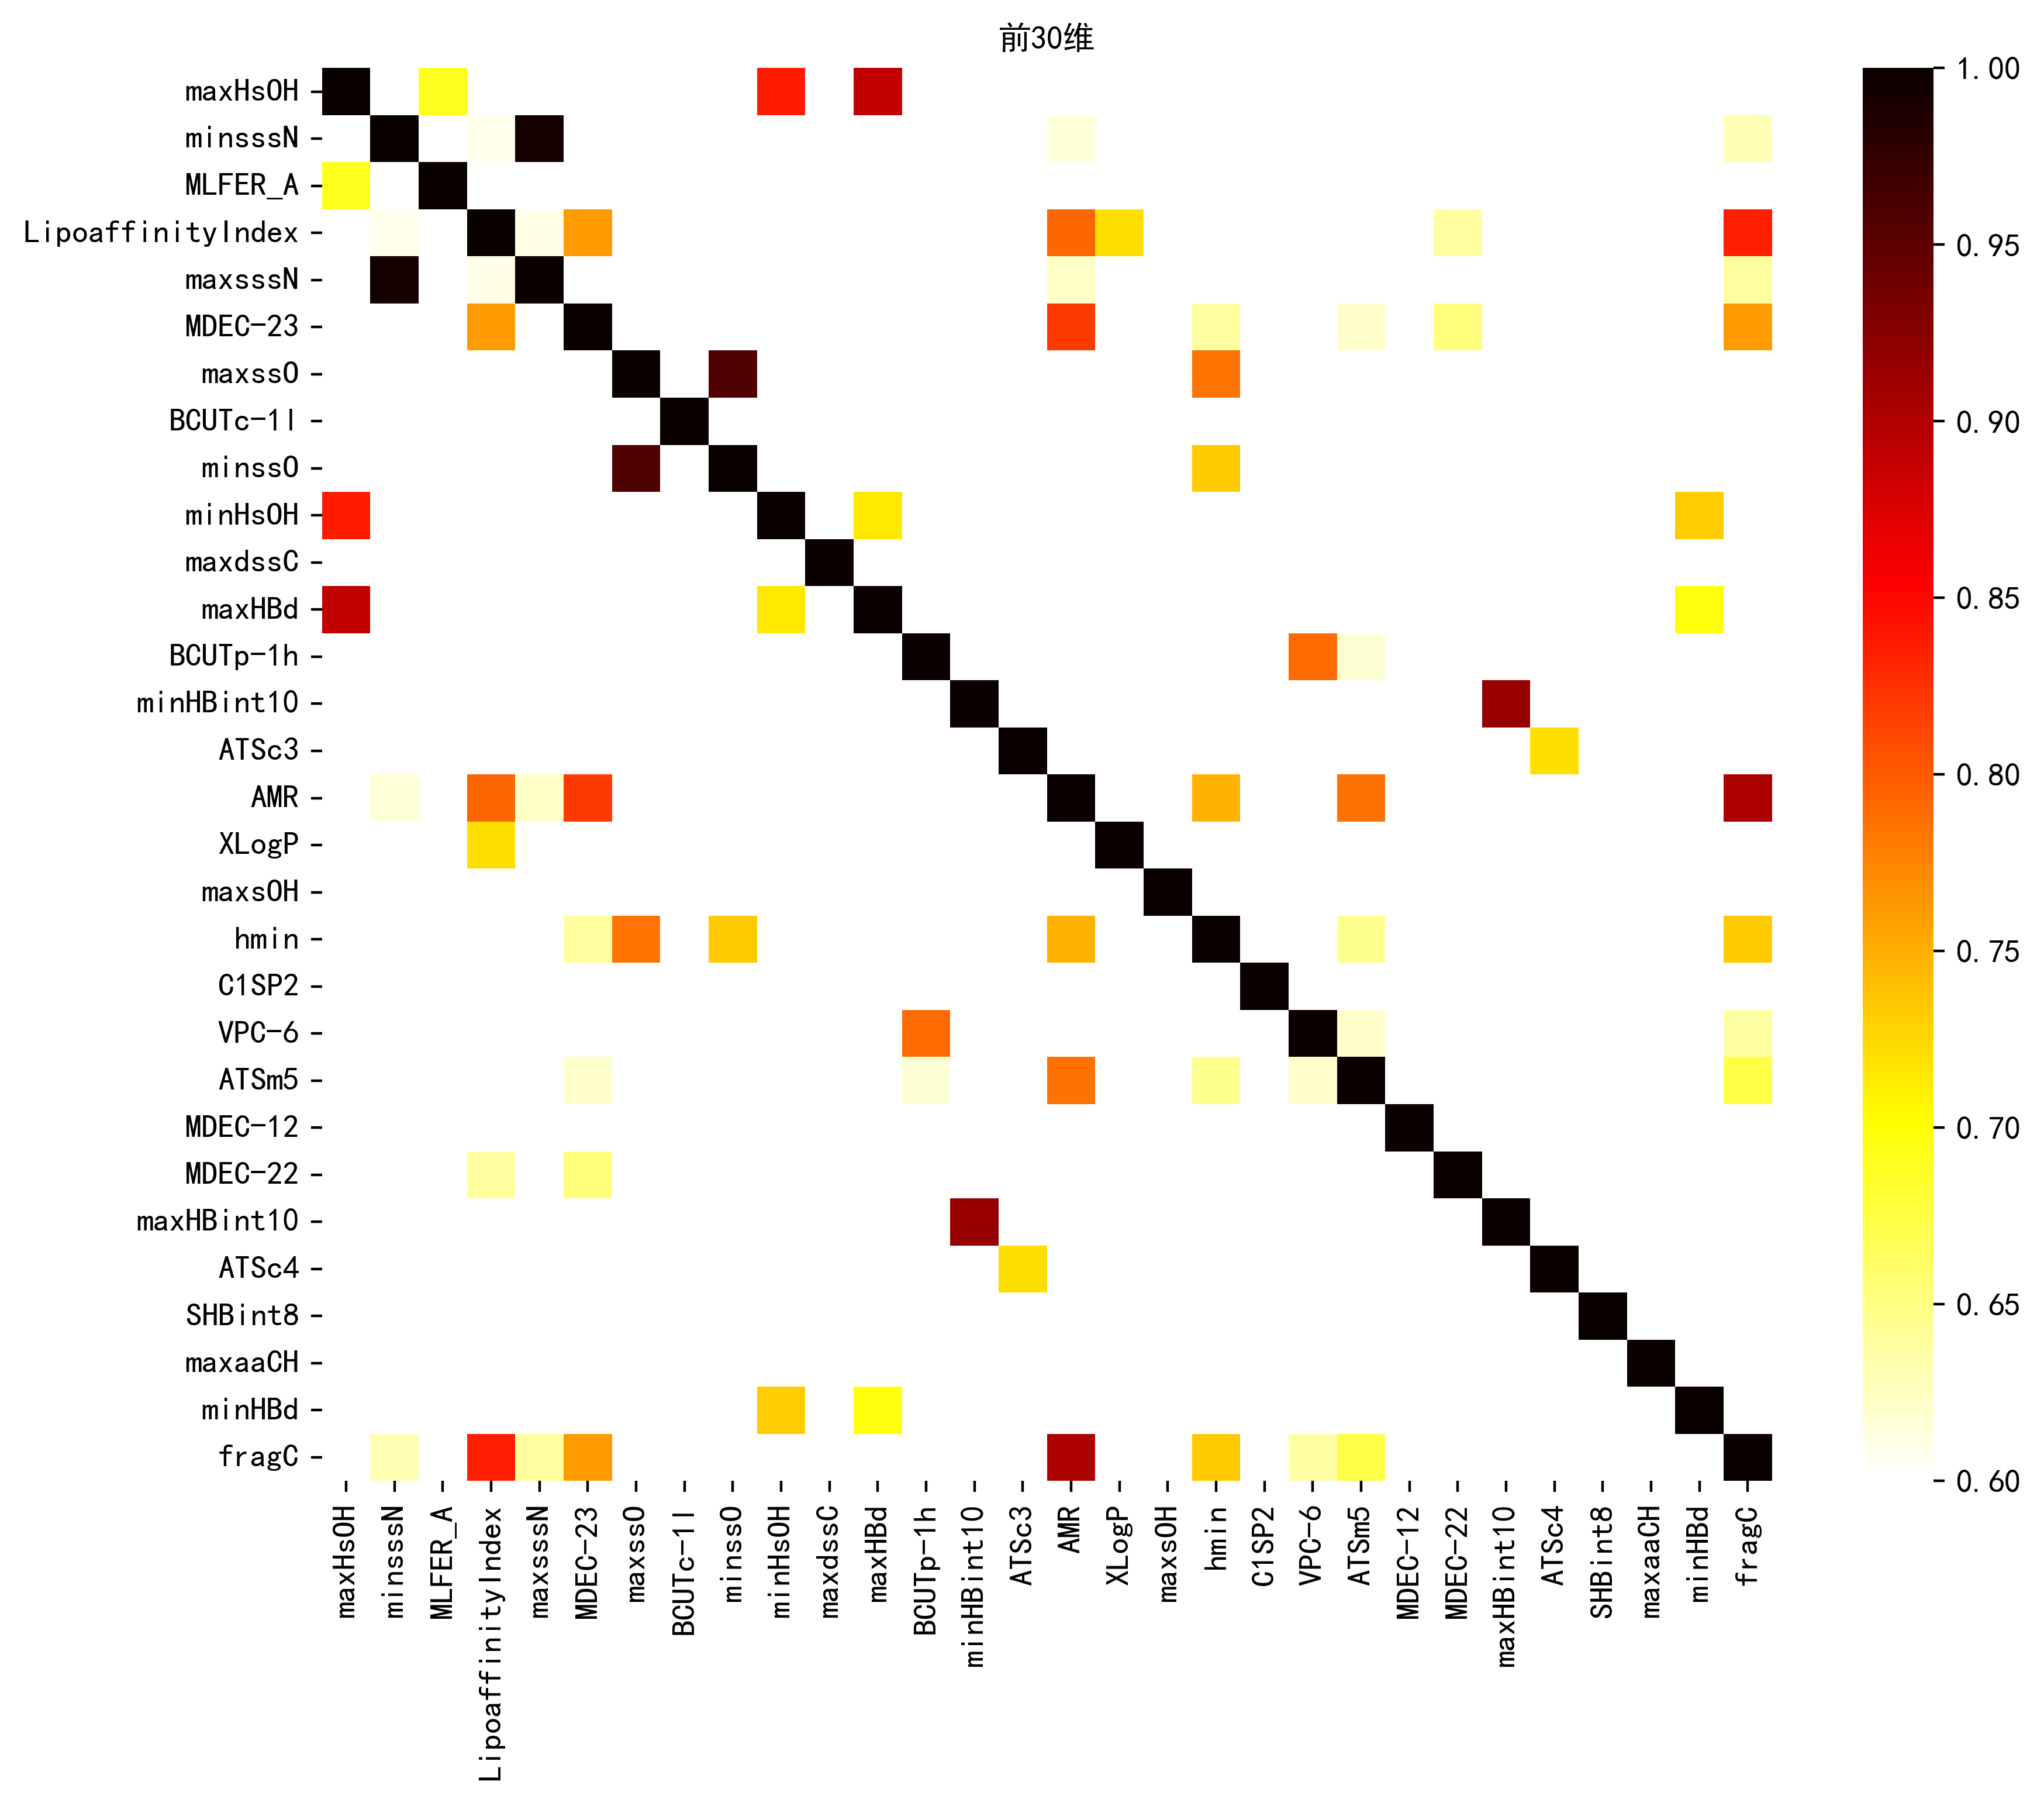

In [18]:
data1=data[feature_30]
#Spearman相关性分析
corrlation1=abs(data1.corr(method='spearman'))
corrlation1
#绘制30个特征相关性热力图
plt.figure(figsize=(10,8),dpi=400)
sns.heatmap(corrlation1,vmin=0.6,vmax=1,cmap='hot_r')
plt.title("前30维",fontsize=10)

# 生成前20维新数据集(不剔除)和热力图


Text(0.5, 1.0, '前20维')

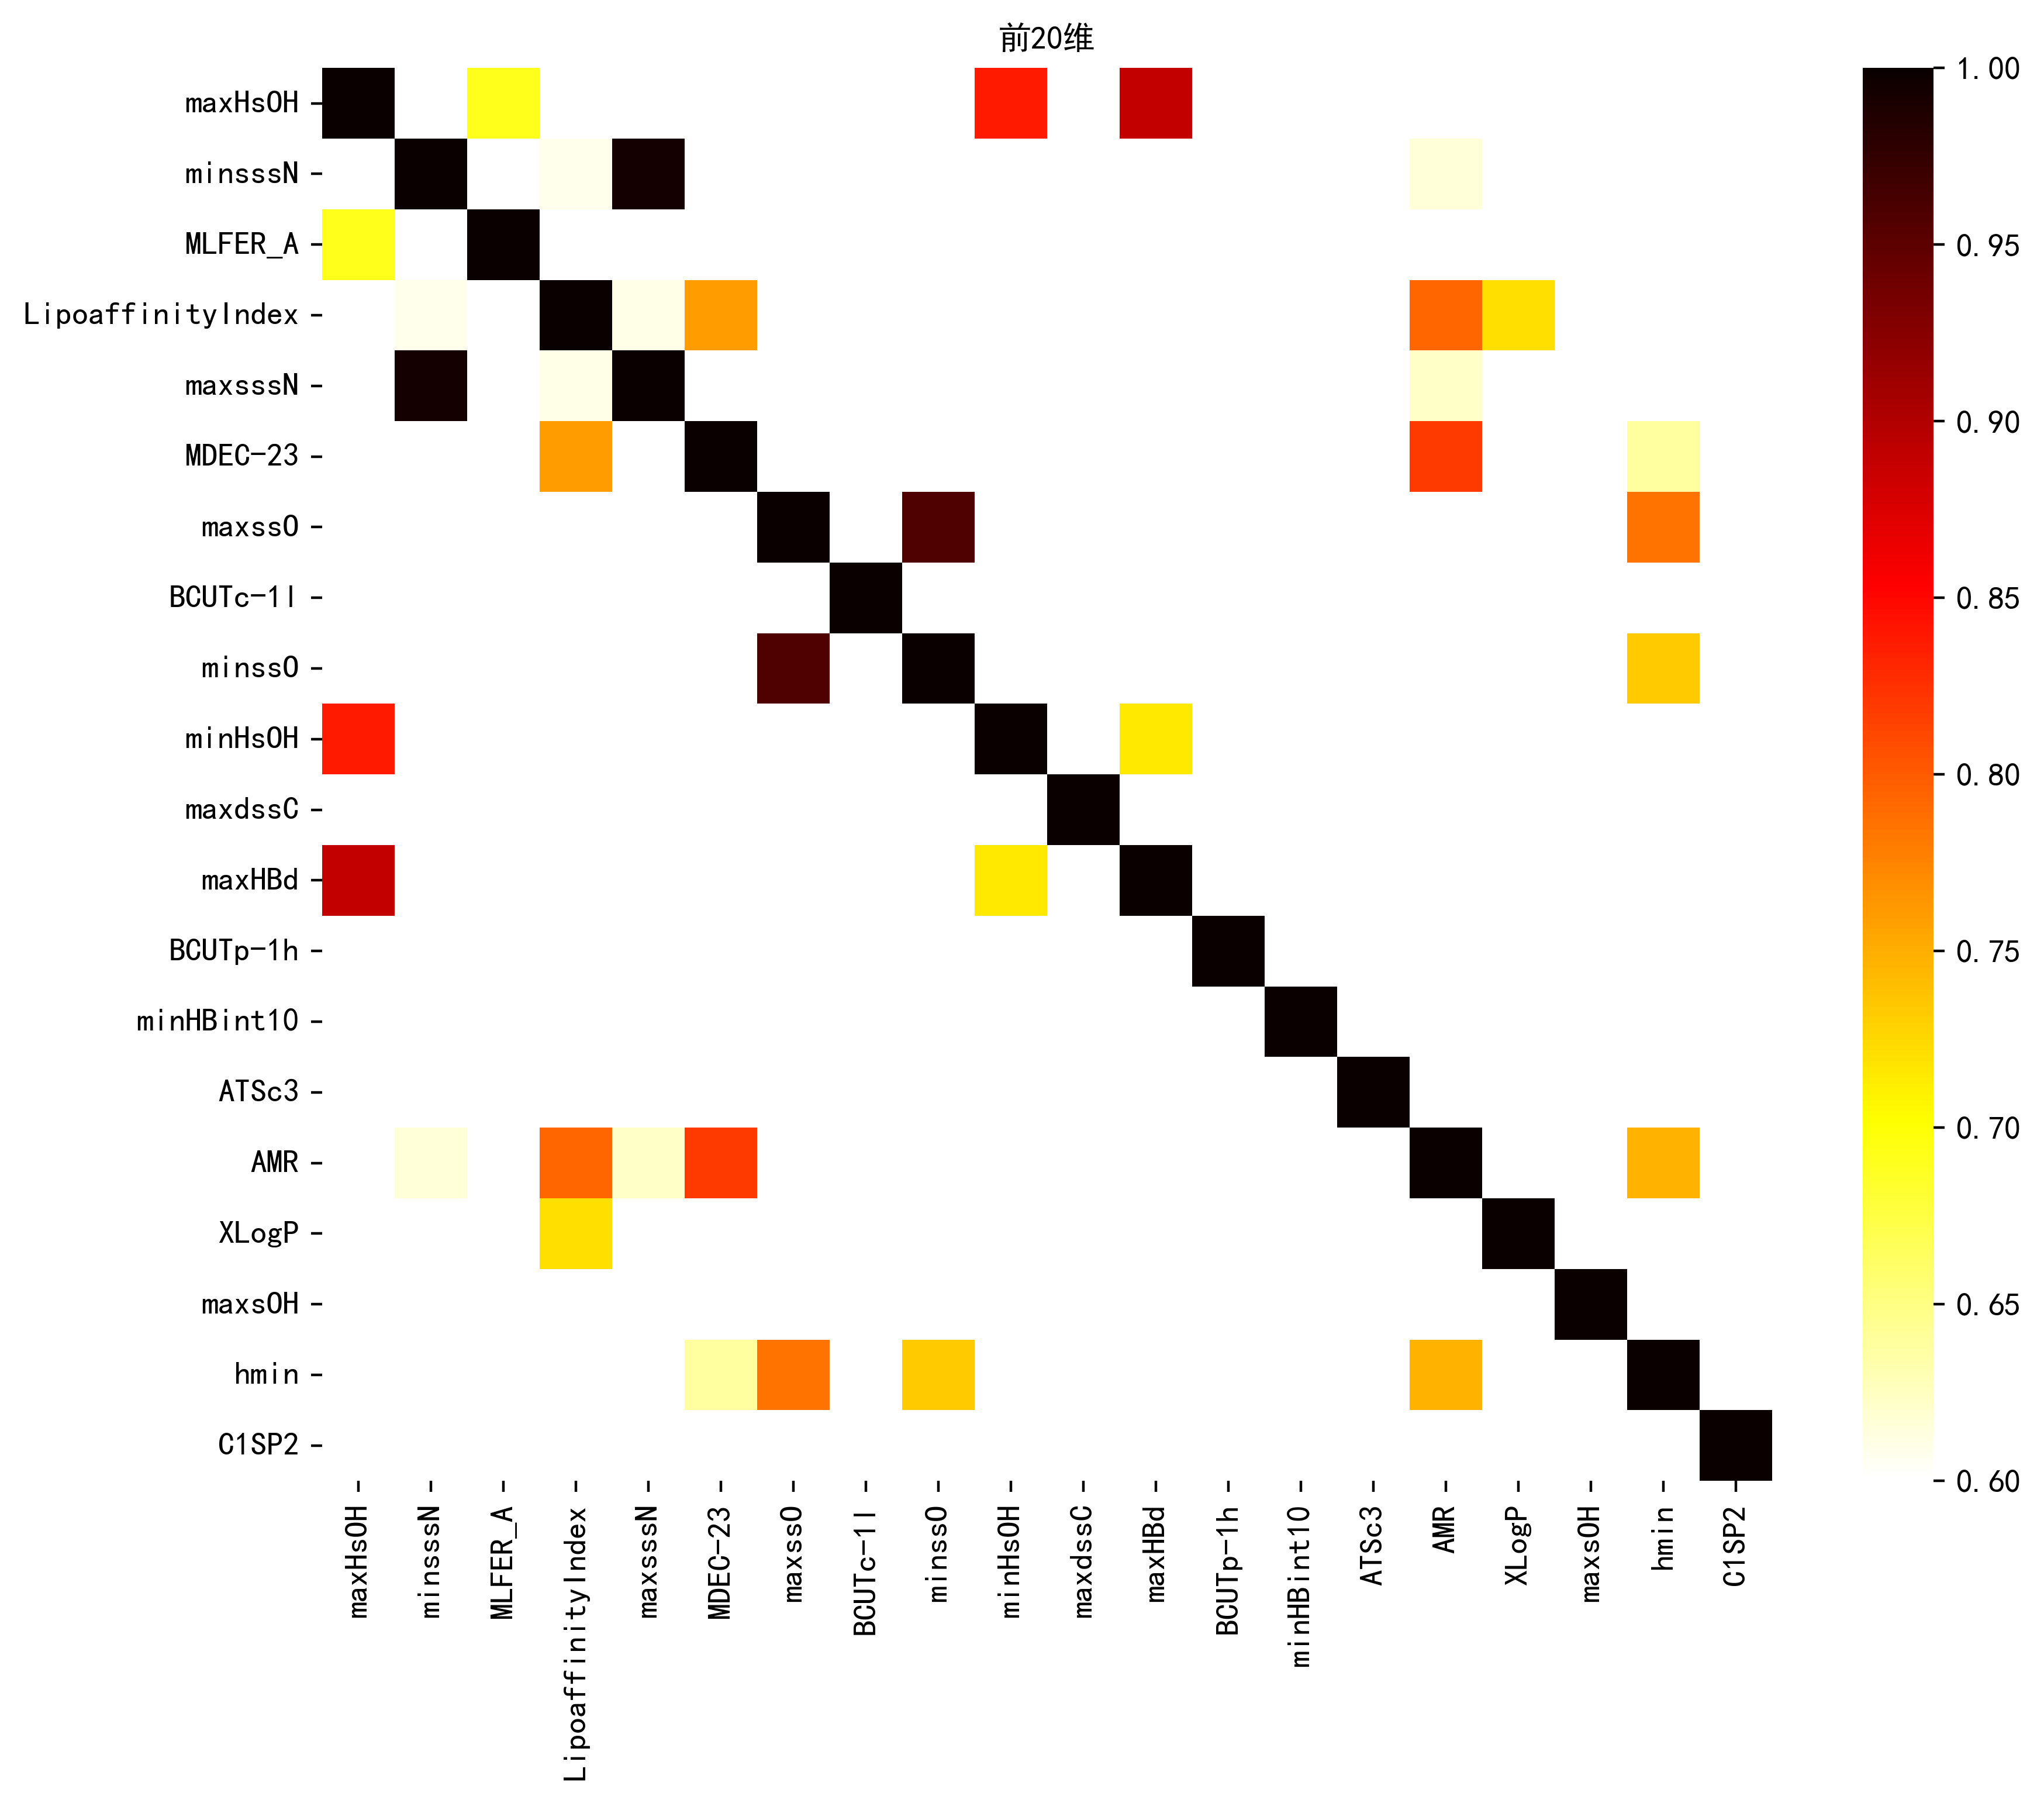

In [19]:
data2=data[feature_20]
#Spearman相关性分析
corrlation2=abs(data2.corr(method='spearman'))
corrlation2
#绘制20个特征相关性热力图
plt.figure(figsize=(10,8),dpi=400)
sns.heatmap(corrlation2,vmin=0.6,vmax=1,cmap='hot_r')
plt.title("前20维",fontsize=10)

# 生成通过特征相关性剔除后的20维新数据

In [30]:
#按特征相关性去除10个特征
feature_cor=feature_30
feature_del=['fragC','maxsssN','maxHBd','minHBint10','hmin','AMR','minHsOH','LipoaffinityIndex','ATSc4','minssO']
for i in feature_del:
    feature_cor.remove(i)
len(feature_cor)

20

Text(0.5, 1.0, '20维')

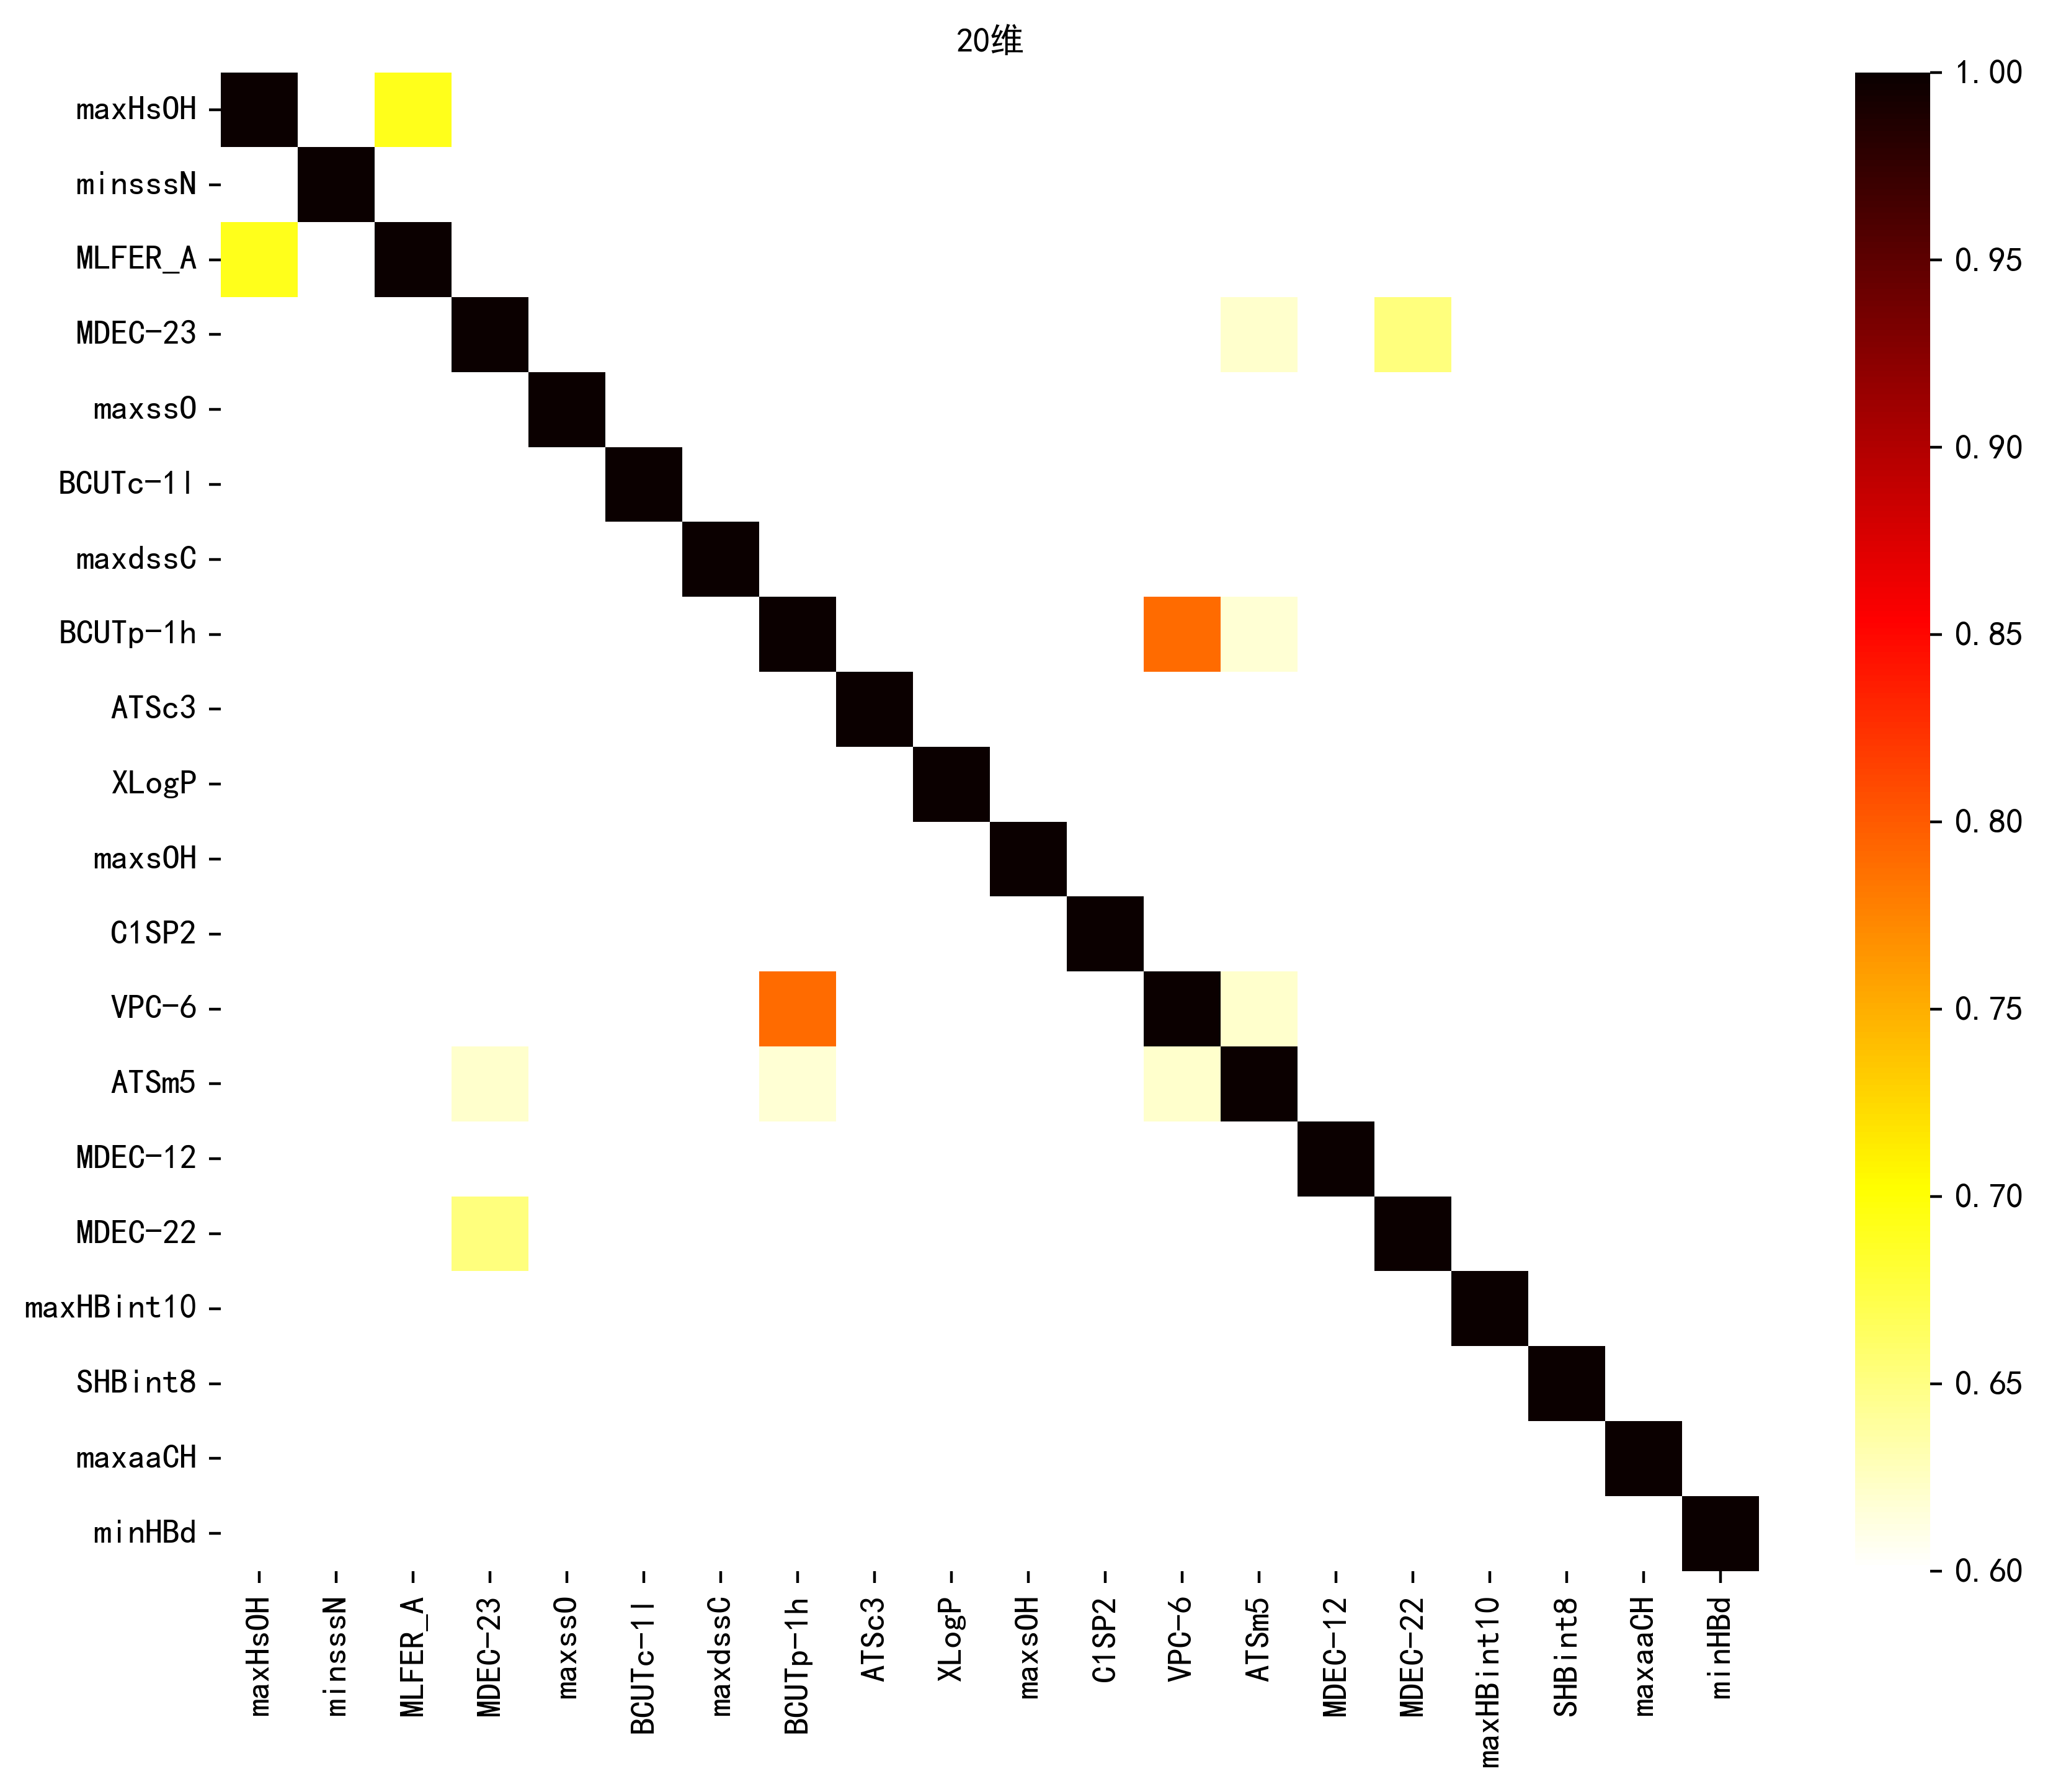

In [21]:
data3=data[feature_cor]
#Spearman相关性分析
corrlation3=abs(data3.corr(method='spearman'))
corrlation3
#绘制20个特征相关性热力图
plt.figure(figsize=(10,8),dpi=400)
sns.heatmap(corrlation3,vmin=0.6,vmax=1,cmap='hot_r')
plt.title("20维",fontsize=10)

# 用特征相关性剔除后的特征训练模型预测pIC50的值

In [23]:
#生成新数据集
data_504=data.iloc[:,:504]
X=data_504
y=label
#划分训练集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=56)
#标准化
y_train

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#生成模型名字
names = [
        "KNeighborsRegressor"
        , "RBF SVR"
        ,"RandomForestRegressor"
        ,"GradientBoostingRegressor"
        ]
classifiers = [KNeighborsRegressor()
                ,SVR(kernel="rbf")
                ,RandomForestRegressor()
                ,GradientBoostingRegressor(n_estimators=200)
                 ]
#生成评估数组
regressor_df = pd.DataFrame(index = names,columns=['MSE','R2'])
regressor_df

for name, clf in zip(names, classifiers):
    print("---start\t" + name + "\t----")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    MSE = mean_absolute_error(y_pred,y_test)
    R2 = r2_score(y_test,y_pred)
    regressor_df.loc[name]['MSE']=MSE
    regressor_df.loc[name]['R2'] = R2
regressor_df

---start	KNeighborsRegressor	----
---start	RBF SVR	----


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---start	RandomForestRegressor	----


C:\Users\赵龙\AppData\Local\Temp\ipykernel_37688\1339577776.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


---start	GradientBoostingRegressor	----


d:\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,MSE,R2
KNeighborsRegressor,0.560986,0.714895
RBF SVR,0.559216,0.724406
RandomForestRegressor,0.534349,0.742888
GradientBoostingRegressor,0.539523,0.738978


In [24]:
#生成新数据集
data_cor=data[feature_cor]
X=data_cor
y=label
#划分训练集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=56)
#标准化
y_train

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#生成模型名字
names = [
        "KNeighborsRegressor"
        , "RBF SVR"
        ,"RandomForestRegressor"
        ,"GradientBoostingRegressor"
        ]
classifiers = [KNeighborsRegressor()
                ,SVR(kernel="rbf")
                ,RandomForestRegressor()
                ,GradientBoostingRegressor(n_estimators=200)
                 ]
#生成评估数组
regressor_df = pd.DataFrame(index = names,columns=['MSE','R2'])
regressor_df

for name, clf in zip(names, classifiers):
    print("---start\t" + name + "\t----")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    MSE = mean_absolute_error(y_pred,y_test)
    R2 = r2_score(y_test,y_pred)
    regressor_df.loc[name]['MSE']=MSE
    regressor_df.loc[name]['R2'] = R2
regressor_df

---start	KNeighborsRegressor	----
---start	RBF SVR	----
---start	RandomForestRegressor	----


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\赵龙\AppData\Local\Temp\ipykernel_37688\83063162.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


---start	GradientBoostingRegressor	----


d:\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,MSE,R2
KNeighborsRegressor,0.602847,0.673951
RBF SVR,0.595503,0.687844
RandomForestRegressor,0.546885,0.723071
GradientBoostingRegressor,0.58546,0.702788


In [35]:
data[feature_cor].to_excel('D:\\my_dateset\\data_20.xlsx')

# 生成test数据集

In [37]:
feature_test=pd.read_excel('D:\my_dateset\Molecular_Descriptor.xlsx',index_col='SMILES',sheet_name='test')


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, COc1cc(OC)cc(\C=C\c2ccc(OS(=O)(=O)[C@@H]3C[C@@H]4O[C@H]3C(=C4c5ccc(O)cc5)c6ccc(O)cc6)cc2)c1 to CCC(=C(c1ccc(O)cc1)c2ccc(OCCN3CCCC3)cc2)Cc4ccccc4
Columns: 729 entries, nAcid to Zagreb
dtypes: float64(308), int64(421)
memory usage: 285.2+ KB


In [41]:
Molecular_Descriptor_test=feature_test[feature_cor]
Molecular_Descriptor_test.to_excel('D:\\my_dateset\\Molecular_Descriptor_test.xlsx')